# Projet statistique 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Statistique descriptive I

Le jeu de donnees que nous etudierons ici est "tips.csv". Il contient les donnees sur les pourboires (tip) laisser par des clients dans un restaurant ainsi que des variables telles que : total_bill (facture total), sex (sexe), smoker (fumeur ou non), day (jour de la semaine), time (le repas), size (taille).

In [2]:
df = pd.read_csv("tips.csv", header = 0)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Nous etudierons les caracteres quantitatifs et qualitatifs "total_bill" et "sex".

## Variable Numerique

<Axes: >

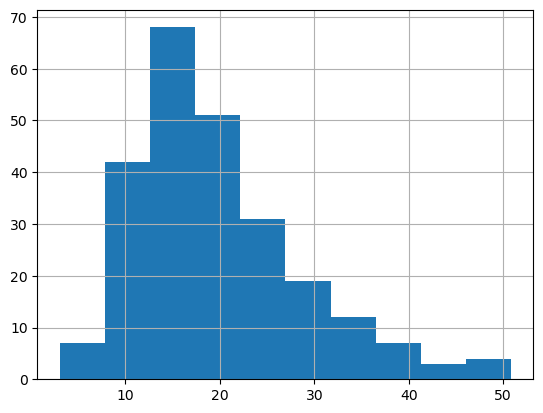

In [3]:
df["total_bill"].hist()

On remarque que la variable "total_bill" suit une loi normale.

$$X \sim \mathcal{N}(\overline{x},\,\sigma^{2})$$

Pour determiner la moyenne, les quartiles, l'ecart-type et la variance, nous utiliserons des methodes predefinient. Ces methodes là se basent sur les relations vues en cours:

La moyenne: 
$$\overline{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i}=\frac{1}{n}\left(x_{1}+\cdots+x_{n}\right)$$

L'ecart-type: 
$$\sigma = \sqrt{\frac{\sum_{i=1}^{N}(x_i - \overline{x})^2}{N}}$$

La variance :
$$\sigma^2 = \frac{\sum_{i=1}^{N}(x_i - \mu)^2}{N}$$


In [4]:
# Moyenne avec intervalle de confiance de 95%
from math import sqrt

Moyenne = df["total_bill"].mean()
Ecart_type = df["total_bill"].std()
n = df["total_bill"].count()
Z = 1.96

# print(Moyenne, Ecart_type, n)
low_lmt = round(Moyenne - Z*Ecart_type/sqrt(n),2)
high_lmt = round(Moyenne + Z*Ecart_type/sqrt(n),2)
print("Intervalle de confiance: ["+str(low_lmt)+","+ str(high_lmt)+"]")

Intervalle de confiance: [18.67,20.9]


Donc les clients ont 95% de chance d'avoir en moyenne une facture entre 18 dollars et 21 dollars.

In [5]:
Mediane = df["total_bill"].median() 
Minimum = df["total_bill"].min() 
Maximum = df["total_bill"].max() 
Variance = Ecart_type**2 

$$\text{La mediane etant de 17.8\$, alors environs 50\% des clients de ce restaurant paye une facture de 17.8\$}$$
$$\text{Ecart-type = 8.9}$$
$$\text{Variance = 79.25}$$
$$\text{Minimum = 3.07}$$
$$\text{Max = 50.81}$$
$$\text{Quantiles = [ 3.07 ; 13.35 ; 17.8 ; 24.13 ; 50.81 ]}$$

## Variable Categorielle 

In [6]:
df.sex.unique() 

array(['Female', 'Male'], dtype=object)

Cette variable categorielle possede 2 modalités: Male et Female

In [7]:
round(pd.crosstab(df.sex, "freq", normalize=True),2)

col_0,freq
sex,
Female,0.36
Male,0.64


Nous avons une proportion de 36% de femmes contre 64% d'hommes dans notre jeu de données.

Afin de determiner l'intervalle de confiance, nous allons utiliser la relation: 
$$\hat{p} \pm Z \times \sqrt{\frac{\hat{p}(1 - \hat{p})}{n} }$$
où $$\hat{p}: frequence $$

In [8]:
Female_frq = round(df["sex"].value_counts()["Female"]/df["sex"].count(),2)
Male_frq = round(df["sex"].value_counts()["Male"]/df["sex"].count(),2)

In [9]:
e_Female = Z*sqrt((Female_frq*(1-Female_frq))/n)
e_Male = Z*sqrt((Male_frq*(1-Female_frq))/n)

In [10]:
print(f"A 95%, l'intervalle [{round(Female_frq-e_Female,2)} , {round(Female_frq+e_Female,2)}] contient le pourcentage de femme dans le groupe.")
print(f"A 95%, l'intervalle [{round(Male_frq-e_Female,2)} , {round(Male_frq+e_Female,2)}] contient le pourcentage d'homme dans le groupe.")

A 95%, l'intervalle [0.3 , 0.42] contient le pourcentage de femme dans le groupe.
A 95%, l'intervalle [0.58 , 0.7] contient le pourcentage d'homme dans le groupe.


Ainsi, nous avons 95% de chances d'avoir une frequence de femme entre 30% et 42%. Et les mêmes chances d'avoir une frequence d'homme entre 58% et 70%.